<a href="https://colab.research.google.com/github/DemonCyborg007/Interpretable_Stock_MLmodel/blob/main/Close_Gsp4attrri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is created by Mayukh Roy. For understanding the LSTM stock-market prediction model. We have applied 4 attributed  

1.   Open
2.   High
3.   Low
4.   Close

With the help of these features or attributes we have trained our model.
Then we have applied the interpretable AI library SHAP (Shapley Additive Explaination) which finds a mean value known as shap value which helps us to understand which features affected our output the most.

mrdemoncyborg007@gmail.com

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Train.csv')
# df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv') 

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


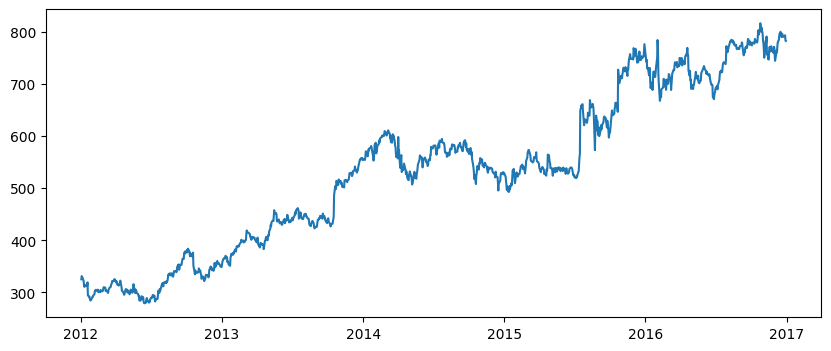

In [72]:
plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(df_train['Date']), df_train['Open'])
plt.show()

In [7]:
df_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [8]:
df_train["Close"] = df_train["Close"].str.replace(',', '').astype(float)
df_train.dtypes
X = df_train[['Open','High','Low','Close']]

In [9]:
X

,Open,High,Low,Close
0,325.25,332.83,324.97,663.59
1,331.27,333.87,329.08,666.45
2,329.83,330.75,326.89,657.21
3,328.34,328.77,323.68,648.24
4,322.04,322.29,309.46,620.76
...,...,...,...,...
1253,790.90,792.74,787.28,789.91
1254,790.68,797.86,787.66,791.55
1255,793.70,794.23,783.20,785.05
1256,783.33,785.93,778.92,782.79


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
df_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [11]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602]])

In [12]:
X_scaled.shape

(1258, 4)

In [13]:
rows = []
y = []
for i in range(1198):
    rows.append(X_scaled[i:60+i])
    y.append(X_scaled[60+i,3])
X_final = np.array(rows)
y_final = np.array(y)

In [ ]:
y

In [14]:
y_final.shape

(1198,)

In [15]:
y_final

array([0.21420007, 0.20434657, 0.21216047, ..., 0.40495845, 0.40184391,
       0.38672602])

In [16]:
X_final.shape

(1198, 60, 4)

In [17]:
X_final_train, X_final_test,y_final_train, y_final_test = train_test_split(X_final,y_final ,random_state=104, test_size=0.25, shuffle=False)

In [ ]:
y_final_test

In [18]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
model = Sequential()
model.add(LSTM(70, return_sequences = True, input_shape = (60,4)))
model.add(LSTM(70, return_sequences = True))
model.add(LSTM(70, return_sequences = True))
model.add(LSTM(70, return_sequences = False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [20]:
history = model.fit(X_final_train, y_final_train, batch_size=32, epochs=60)

Train on 898 samples
Epoch 1/60
898/898 [==============================] - 7s 8ms/sample - loss: 0.0496
Epoch 2/60
898/898 [==============================] - 4s 4ms/sample - loss: 0.0198
Epoch 3/60
898/898 [==============================] - 5s 5ms/sample - loss: 0.0158
Epoch 4/60
898/898 [==============================] - 4s 4ms/sample - loss: 0.0134
Epoch 5/60
898/898 [==============================] - 4s 4ms/sample - loss: 0.0106
Epoch 6/60
898/898 [==============================] - 4s 5ms/sample - loss: 0.0125
Epoch 7/60
898/898 [==============================] - 5s 5ms/sample - loss: 0.0082
Epoch 8/60
898/898 [==============================] - 4s 4ms/sample - loss: 0.0086
Epoch 9/60
898/898 [==============================] - 5s 6ms/sample - loss: 0.0065
Epoch 10/60
898/898 [==============================] - 5s 5ms/sample - loss: 0.0074
Epoch 11/60
898/898 [==============================] - 4s 4ms/sample - loss: 0.0051
Epoch 12/60
898/898 [==============================] - 4s 4ms/sa

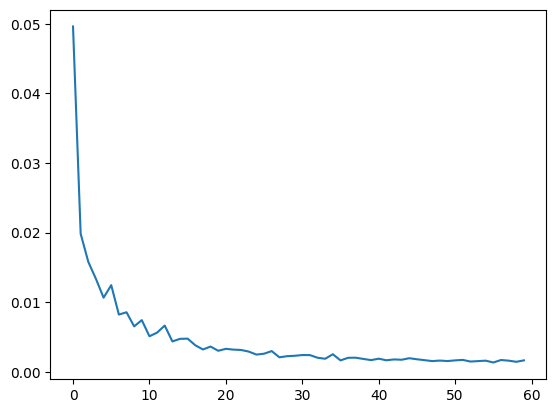

In [21]:
plt.plot(history.history['loss'])

In [ ]:
# df_test.dtypes

In [ ]:
# # df_test["Close"] = df_test["Close"].str.replace(',', '').astype(float)
# # df_test.dtypes
# X_test = df_test[['Open','High','Low','Close']]
# X_test_scaled = scaler.transform(df_test[['Open','High','Low','Close']])
# X_test_scaled.shape

In [ ]:
# X_test_temp = np.vstack([X_scaled[-60:], X_test_scaled])

In [ ]:
# rows = []
# for i in range(20):
#     rows.append(X_test_temp[i:60+i])
# X_test_final = np.array(rows)

In [ ]:
# X_test_final.shape

In [22]:
yp = model.predict(X_final_test)
scaler.scale_

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([0.00186026, 0.00186752, 0.00189423, 0.00137811])

In [ ]:
yp

In [23]:
inv = 1/0.00186026
inv

537.5592659090664

In [24]:
yp_final = yp*inv
yp_final

array([[127.423134],
       [170.12456 ],
       [182.86678 ],
       [182.89981 ],
       [184.41539 ],
       [188.2223  ],
       [185.36064 ],
       [190.26443 ],
       [193.75725 ],
       [199.18224 ],
       [203.24341 ],
       [204.36996 ],
       [198.21132 ],
       [198.4837  ],
       [205.54028 ],
       [203.4906  ],
       [192.78102 ],
       [197.1074  ],
       [198.69688 ],
       [208.85632 ],
       [211.39465 ],
       [225.00218 ],
       [228.37595 ],
       [221.30937 ],
       [220.42574 ],
       [221.55016 ],
       [216.50769 ],
       [233.3432  ],
       [236.4242  ],
       [227.84422 ],
       [235.5582  ],
       [236.18405 ],
       [234.41763 ],
       [226.21237 ],
       [223.485   ],
       [214.19675 ],
       [218.45244 ],
       [220.21753 ],
       [229.12999 ],
       [227.10904 ],
       [217.23419 ],
       [221.11917 ],
       [224.52429 ],
       [225.11987 ],
       [223.69345 ],
       [234.04485 ],
       [248.8359  ],
       [247.0

In [ ]:
# plt.figure(figsize=(6,4))
# plt.plot(df_test['Open'], c='blue')
# plt.plot(yp_final, c='red')

In [ ]:
# plt.figure(figsize=(6,4))
# plt.plot(df_test['Close'], c='blue')
# plt.plot(yp_final, c='red')

In [25]:
#parameter increaser
yp_final=yp*inv #actual/pred

In [26]:
y_new_inverse = y_final_test*inv

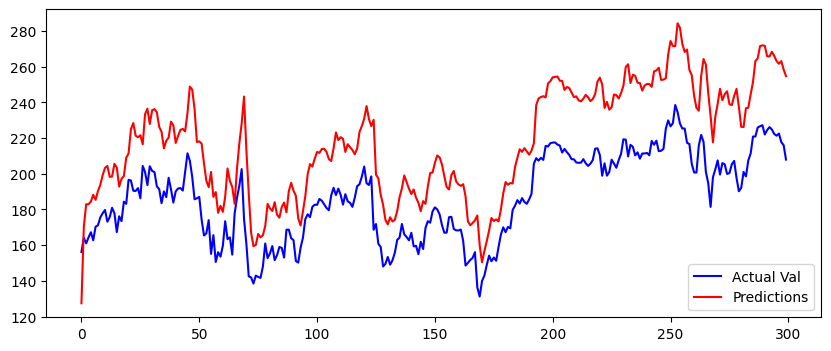

In [32]:
plt.figure(figsize=(10,4))
plt.plot(y_new_inverse, c='blue') #actual
plt.plot(yp_final, c='red') #predicted
plt.legend([ 'Actual Val', 'Predictions'], loc='lower right')

Why our model is predicting like this? 

Appling Interpretation in our LSTM model of stock market.

We will use SHAP(Shapley Additive Explaination) value method and LIME(Local Interpretable Model-agnostic Explanations) method 



---



**SHAP Method (Shapley Additive explanation)**

In [34]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 38.6 MB/s eta 0:00:00


In [35]:
#shap value method
import shap

In [36]:
# compute SHAP values
explainer = shap.DeepExplainer(model, X_final_train)
shap_values = explainer.shap_values(X_final_test)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [46]:
X.values[:60].shape

(60, 4)

In [43]:
shap_values[0][0].shape

(60, 4)

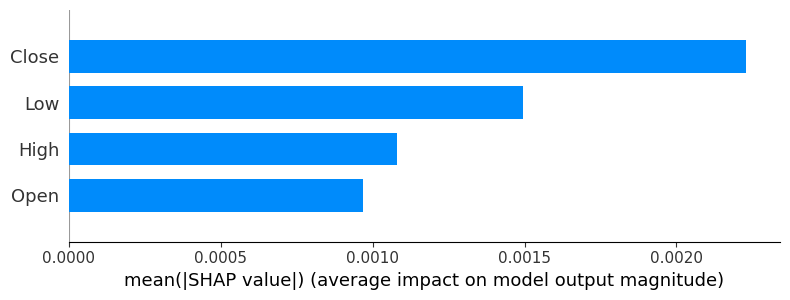

In [47]:
shap.summary_plot(shap_values[0][0], X.values[:60], plot_type="bar", feature_names = X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


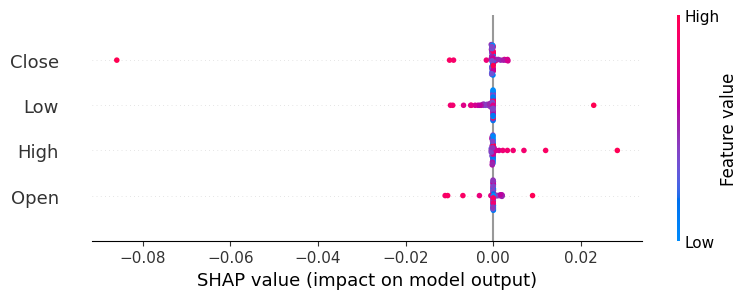

In [48]:
shap.summary_plot(shap_values[0][0], X.values[:60], feature_names = X.columns)

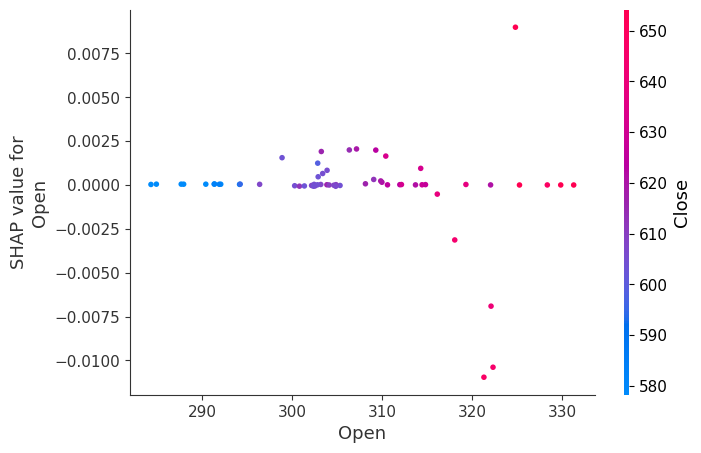

In [51]:
shap.dependence_plot(0, shap_values[0][0], X.values[:60], feature_names=X.columns)

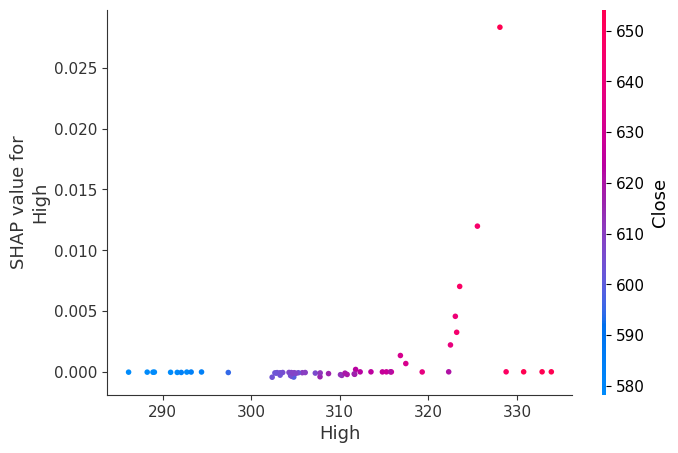

In [52]:
shap.dependence_plot(1, shap_values[0][0], X.values[:60], feature_names=X.columns)

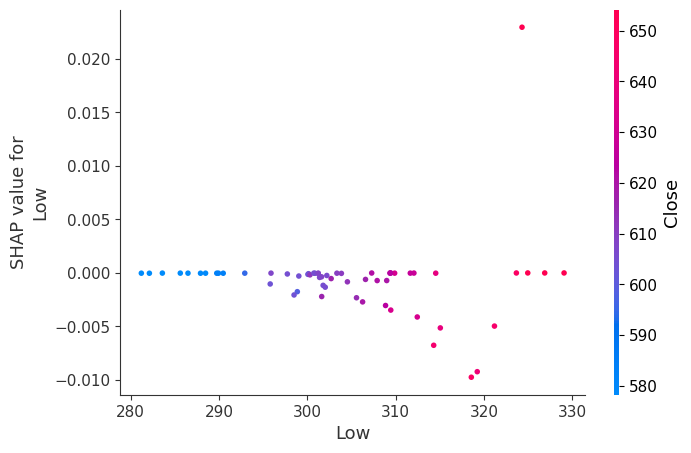

In [53]:
shap.dependence_plot(2, shap_values[0][0], X.values[:60], feature_names=X.columns)

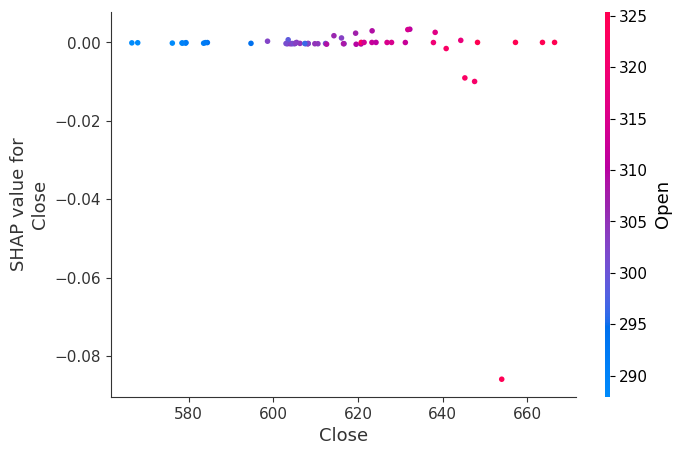

In [54]:
shap.dependence_plot(3, shap_values[0][0], X.values[:60], feature_names=X.columns)

In [56]:
shap.initjs() #it should be in that code cell only or else it wont work

In [65]:
explainer.expected_value

array([0.3287603], dtype=float32)

In [68]:
shap.initjs()
i=1
shap.force_plot(explainer.expected_value[0], shap_values[0][0][i], X.values[i], feature_names = X.columns)

Force Plot is a local analysis for a single output
We can use this to detect and analyse each output difference , error etc.

**What is the meaning of above visualization?**

1. The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = 0.3287603

2. The numbers on the plot arrows are the value of the feature for this instance. 

3. Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.

4. The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis

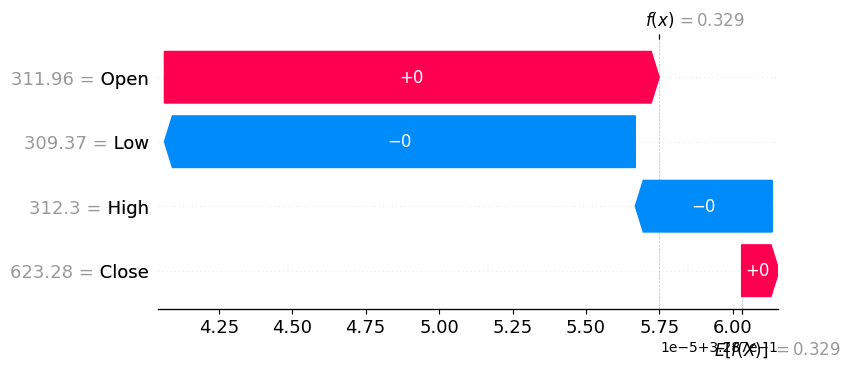

In [71]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0][row], base_values=explainer.expected_value[0], data=X.iloc[row],  feature_names=X.columns.tolist()))

The waterfall plot is another local analysis plot of a single instance prediction.
1. f(x) is the model predict_proba value: 0.329.
2. E[f(x)] is the base value = 0.328.
3. On the left are the features value and on the arrows the feature contribution to the prediction.
4. Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction

---
**LIME Method ( Local Interpretable Model-agnostic Explanations )**

In [ ]:
# pip install lime

In [ ]:
# # And for the most important part, since our Keras model doesn’t implement a predict_proba function like the sci-kit learn models we need to manually create one
# from lime.lime_text import LimeTextExplainer
# class_names=['negative','positive']
# explainer= LimeTextExplainer(class_names=class_names)
# def predict_proba(arr):
#   processed=[]
#   for i in arr:
#     processed.append(process_text(i))
#   list_tokenized_ex = tokenizer.texts_to_sequences(processed)
#   Ex = pad_sequences(list_tokenized_ex, maxlen=max_review_length)
#   pred=model.predict(Ex)
#   returnable=[]
#   for i in pred:
#     temp=i[0]
#     returnable.append(np.array([1-temp,temp])) #I would recommend rounding temp and 1-temp off to 2 places
#   return np.array(returnable)



In [ ]:
# print("Actual rating",data_to_test['num_rating'][7574])

# explainer.explain_instance(data_to_test['review_text'][7574],predict_proba).show_in_notebook(text=True)